# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approve

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


# Import some useful Libraries

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

## 1.1 Reading Data

In [2]:
import pandas as pd

project_data=pd.read_csv("train_data.csv")
resource_data=pd.read_csv("resources.csv")

In [3]:
project_data.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0


In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
print("Number of data points in resources data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in resources data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [6]:
# Print some train dataframe

project_data.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0


## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data["project_subject_categories"].values)

# remove special characters from list of strings

cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
print(sorted_cat_dict)

project_data.head()

{'Warmth': 1388, 'Care_Hunger': 1388, 'History_Civics': 5914, 'Music_Arts': 10293, 'AppliedLearning': 12135, 'SpecialNeeds': 13642, 'Health_Sports': 14223, 'Math_Science': 41421, 'Literacy_Language': 52239}


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

print(sorted_sub_cat_dict)

project_data.head()

{'Economics': 269, 'CommunityService': 441, 'FinancialLiteracy': 568, 'ParentInvolvement': 677, 'Extracurricular': 810, 'Civics_Government': 815, 'ForeignLanguages': 890, 'NutritionEducation': 1355, 'Warmth': 1388, 'Care_Hunger': 1388, 'SocialSciences': 1920, 'PerformingArts': 1961, 'CharacterEducation': 2065, 'TeamSports': 2192, 'Other': 2372, 'College_CareerPrep': 2568, 'Music': 3145, 'History_Geography': 3171, 'Health_LifeScience': 4235, 'EarlyDevelopment': 4254, 'ESL': 4367, 'Gym_Fitness': 4509, 'EnvironmentalScience': 5591, 'VisualArts': 6278, 'Health_Wellness': 10234, 'AppliedSciences': 10816, 'SpecialNeeds': 13642, 'Literature_Writing': 22179, 'Mathematics': 28074, 'Literacy': 33700}


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science,Literacy Mathematics
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science,Mathematics


## 1.3 Text preprocessing

# [1.3.1] Essays

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...


In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be abl

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:53<00:00, 2033.94it/s]


In [18]:
# Merging preprocessed_essays in project_data

project_data['cleaned_essays'] = preprocessed_essays

project_data.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,cleaned_essays
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,my students english learners working english s...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,our students arrive school eager learn they po...
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports,"\r\n\""True champions aren't always the ones th...",true champions not always ones win guts by mia...


# [1.3.2] Title

In [19]:


# Data preprocessing on title text
from tqdm import tqdm
import re
import string
from bs4 import BeautifulSoup
preprocessed_title_text = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = re.sub("\S*\d\S*", "", sent).strip()
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title_text.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:03<00:00, 36212.55it/s]


In [20]:
project_data = pd.DataFrame(project_data)
project_data['cleaned_title_text'] = preprocessed_title_text

project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,cleaned_essays,cleaned_title_text
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,my students english learners working english s...,educational support english learners home
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,our students arrive school eager learn they po...,wanted projector hungry learners


# [1.4] Process Resource Data

In [21]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [22]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [23]:
# Check for Null values in price data
price_data.isnull().any().any()

False

In [24]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('null')
 
project_data.head(2)


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,cleaned_essays,cleaned_title_text
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,my students english learners working english s...,educational support english learners home
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,our students arrive school eager learn they po...,wanted projector hungry learners


# Join train & Resource dataset

In [25]:
# join two dataframes in python: 
data = pd.merge(project_data, price_data, on='id', how='left')

In [26]:
approved_price = data[data['project_is_approved']==1]['price'].values

rejected_price = data[data['project_is_approved']==0]['price'].values

In [27]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
import numpy as np


t = PrettyTable()
t.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    t.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(t)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

In [28]:
data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,cleaned_essays,cleaned_title_text,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",...,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,my students english learners working english s...,educational support english learners home,154.6,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,...,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,our students arrive school eager learn they po...,wanted projector hungry learners,299.0,1


# <h1> Train Test split</h1>

In [29]:
print("Shape of data is : ",data.shape)
project_data["project_is_approved"].value_counts()

Shape of data is :  (109248, 22)


1    92706
0    16542
Name: project_is_approved, dtype: int64

In [30]:
# Define x & y for splitting

y=data['project_is_approved'].values
data.drop(['project_is_approved'], axis=1, inplace=True)      # drop project is approved columns  

x=data

In [31]:
# break in train test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2,stratify = y)

# now break trainig data further in train and cv
#x_train,x_cv,y_train,y_cv= train_test_split(x_train, y_train, test_size=0.3 ,random_state=2,stratify=y_train)

# One Hot Encoding of Categorical Data

In [32]:
# OHE of subject category
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize


vectorizer1 = CountVectorizer()
vectorizer1.fit(x_train['clean_categories'].values) # fit has to happen only on train data


# we use the fitted CountVectorizer to convert the text to vector
x_train_clean_cat_ohe = vectorizer1.transform(x_train['clean_categories'].values)
#x_train_clean_cat_ohe = normalize(x_train_clean_cat_ohe,axis=0)
#x_cv_clean_cat_ohe = vectorizer.transform(x_cv['clean_categories'].values)
x_test_clean_cat_ohe = vectorizer1.transform(x_test['clean_categories'].values)
#x_test_clean_cat_ohe = normalize(x_test_clean_cat_ohe,axis=0)

print("After vectorizations")
print(x_train_clean_cat_ohe.shape, y_train.shape)
#print(x_cv_clean_cat_ohe.shape, y_cv.shape)
print(x_test_clean_cat_ohe.shape, y_test.shape)
print(vectorizer1.get_feature_names())
print("="*100)

After vectorizations
(87398, 9) (87398,)
(21850, 9) (21850,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [33]:
# ONE of subject subcategory

vectorizer2 = CountVectorizer()
vectorizer2.fit(x_train['clean_subcategories'].values) # fit has to happen only on train data


# we use the fitted CountVectorizer to convert the text to vector
x_train_clean_subcat_ohe = vectorizer2.transform(x_train['clean_subcategories'].values)
#x_train_clean_subcat_ohe = normalize(x_train_clean_subcat_ohe,axis=0)
#x_cv_clean_subcat_ohe = vectorizer.transform(x_cv['clean_subcategories'].values)
x_test_clean_subcat_ohe = vectorizer2.transform(x_test['clean_subcategories'].values)
#x_test_clean_subcat_ohe = normalize(x_test_clean_subcat_ohe,axis=0)
print("After vectorizations")
print(x_train_clean_cat_ohe.shape, y_train.shape)
#print(x_cv_clean_cat_ohe.shape, y_cv.shape)
print(x_test_clean_cat_ohe.shape, y_test.shape)
print(vectorizer2.get_feature_names())
print("="*100)

After vectorizations
(87398, 9) (87398,)
(21850, 9) (21850,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [34]:
# one hot encoding the catogorical features: categorical_categories
# teacher_prefix

vectorizer3 = CountVectorizer()
vectorizer3.fit(x_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_teacher_pre = vectorizer3.transform(x_train['teacher_prefix'].values)
#x_train_teacher_pre = normalize(x_train_teacher_pre,axis=0)
#x_cv_teacher_pre = vectorizer.transform(x_cv['teacher_prefix'].values)
x_test_teacher_pre = vectorizer3.transform(x_test['teacher_prefix'].values)
#x_test_teacher_pre = normalize(x_test_teacher_pre,axis=0)

print("After vectorizations")
print(x_train_teacher_pre.shape, y_train.shape)
#print(x_cv_teacher_pre.shape, y_cv.shape)
print(x_test_teacher_pre.shape, y_test.shape)
print(vectorizer3.get_feature_names())
print("="*100)


After vectorizations
(87398, 6) (87398,)
(21850, 6) (21850,)
['dr', 'mr', 'mrs', 'ms', 'null', 'teacher']


In [35]:
# school_state

vectorizer4 = CountVectorizer()
vectorizer4.fit(x_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_state_ohe = vectorizer4.transform(x_train['school_state'].values)
#x_train_state_ohe = normalize(x_train_state_ohe,axis=0)

#x_cv_state_ohe = vectorizer.transform(x_cv['school_state'].values)
x_test_state_ohe = vectorizer4.transform(x_test['school_state'].values)
#x_test_state_ohe = normalize(x_test_state_ohe,axis=0)


print("After vectorizations")
print(x_train_state_ohe.shape, y_train.shape)
#print(x_cv_state_ohe.shape, y_cv.shape)
print(x_test_state_ohe.shape, y_test.shape)
print(vectorizer4.get_feature_names())
print("="*100)

After vectorizations
(87398, 51) (87398,)
(21850, 51) (21850,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [36]:
project_grade_category= x_train['project_grade_category'].unique()

vectorizer5 = CountVectorizer(vocabulary=project_grade_category)
vectorizer5.fit(x_train['project_grade_category'].unique()) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_grade_ohe = vectorizer5.transform(x_train['project_grade_category'].values)
#x_train_grade_ohe = normalize(x_train_grade_ohe,axis=0)
#x_cv_grade_ohe = vectorizer.transform(x_cv['project_grade_category'].values)
x_test_grade_ohe = vectorizer5.transform(x_test['project_grade_category'].values)
#x_test_grade_ohe = normalize(x_test_grade_ohe,axis=0)
print("After vectorizations")
print(x_train_grade_ohe.shape, y_train.shape)
#print(x_cv_grade_ohe.shape, y_cv.shape)
print(x_test_grade_ohe.shape, y_test.shape)
print(vectorizer5.get_feature_names())
print("="*100)


After vectorizations
(87398, 4) (87398,)
(21850, 4) (21850,)
['Grades 6-8', 'Grades PreK-2', 'Grades 3-5', 'Grades 9-12']


# Standardize Numerical data

In [37]:
# Standarized the numerical features: Price

from sklearn.preprocessing import Normalizer
price_scalar = Normalizer()
price_scalar.fit(x_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

x_train_price_std = price_scalar.transform(x_train['price'].values.reshape(-1,1))
#x_cv_price_std = price_scalar.transform(x_cv['price'].values.reshape(-1,1))
x_test_price_std = price_scalar.transform(x_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_price_std.shape, y_train.shape)
#print(x_cv_price_std.shape, y_cv.shape)
print(x_test_price_std.shape, y_test.shape)


After vectorizations
(87398, 1) (87398,)
(21850, 1) (21850,)


In [38]:
# Standarized the numerical features: teacher_previously

from sklearn.preprocessing import Normalizer
teacher_previously_scalar = Normalizer()
teacher_previously_scalar.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

x_train_teacher_previously_std = teacher_previously_scalar.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
#x_cv_teacher_previously_std = teacher_previously_scalar.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_test_teacher_previously_std = teacher_previously_scalar.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_teacher_previously_std.shape, y_train.shape)
#print(x_cv_teacher_previously_std.shape, y_cv.shape)
print(x_test_teacher_previously_std.shape, y_test.shape)


After vectorizations
(87398, 1) (87398,)
(21850, 1) (21850,)


In [39]:
# Standarized the numerical features:quantity

from sklearn.preprocessing import Normalizer
quantity_scalar = Normalizer()
quantity_scalar.fit(x_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

x_train_quantity_std = quantity_scalar.transform(x_train['quantity'].values.reshape(-1,1))
#x_cv_teacher_previously_std = teacher_previously_scalar.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_test_quantity_std = quantity_scalar.transform(x_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_quantity_std.shape, y_train.shape)
#print(x_cv_teacher_previously_std.shape, y_cv.shape)
print(x_test_quantity_std.shape, y_test.shape)


After vectorizations
(87398, 1) (87398,)
(21850, 1) (21850,)


# Set 1 : Apply BOW 

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
# Vectorizing text data
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer7 = CountVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
vectorizer7.fit(x_train["cleaned_essays"].values)

features_name7 = vectorizer7.get_feature_names()


x_train_essay_bow = vectorizer7.transform(x_train['cleaned_essays'].values)
#x_train_essay_bow = normalize(x_train_essay_bow,axis=0)
#x_cv_essay_bow = vectorizer.transform(x_cv['cleaned_essays'].values)
x_test_essay_bow = vectorizer7.transform(x_test['cleaned_essays'].values)
#x_test_essay_bow = normalize(x_test_essay_bow,axis=0)

print("After vectorizations")
print(x_train_essay_bow.shape, y_train.shape)
#print(x_cv_essay_bow.shape, y_cv.shape)
print(x_test_essay_bow.shape, y_test.shape)
print("="*100)
print(vectorizer7.get_feature_names())

After vectorizations
(87398, 5000) (87398,)
(21850, 5000) (21850,)


['000', '10', '100', '100 free', '100 percent', '100 students', '100 students receive', '100 students receive free', '11', '12', '12th', '13', '14', '15', '16', '17', '18', '19', '1st', '1st grade', '20', '2016', '2017', '21', '21st', '21st century', '21st century learners', '21st century learning', '21st century skills', '22', '23', '24', '25', '25 students', '26', '28', '2nd', '2nd grade', '2nd graders', '30', '30 students', '3d', '3d printer', '3rd', '3rd grade', '3rd graders', '40', '400', '45', '4th', '4th 5th', '4th grade', '4th graders', '50', '50 students', '500', '5th', '5th grade', '5th grade students', '5th graders', '60', '60 minutes', '60 students', '600', '6th', '6th grade', '6th graders', '70', '75', '7th', '7th 8th', '7th grade', '80', '80 students', '85', '8th', '8th grade', '8th graders', '90', '90 students', '95', '98', '99', '9th', 'abilities', 'ability', 'ability learn', 'ability levels', 'able', 'able access', 'able choose', 'able control', 'able control home', 'a

In [41]:
# BOW on clean_titles

from sklearn.feature_extraction.text import CountVectorizer
vectorizer8 = CountVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
vectorizer8.fit(x_train['cleaned_title_text'].values) # fit has to happen only on train data

features_name8 = vectorizer8.get_feature_names()


# we use the fitted CountVectorizer to convert the text to vector
x_train_titles_bow = vectorizer8.transform(x_train['cleaned_title_text'].values)
#x_train_titles_bow = normalize(x_train_titles_bow,axis=0)
#x_cv_titles_bow = vectorizer.transform(x_cv['cleaned_title_text'].values)
x_test_titles_bow = vectorizer8.transform(x_test['cleaned_title_text'].values)
#x_test_titles_bow = normalize(x_test_titles_bow,axis=0)

print("After vectorizations")
print(x_train_titles_bow.shape, y_train.shape)
#print(x_cv_titles_bow.shape, y_cv.shape)
print(x_test_titles_bow.shape, y_test.shape)
print("="*100)
print(vectorizer8.get_feature_names())

After vectorizations
(87398, 5000) (87398,)
(21850, 5000) (21850,)


['abc', 'abcs', 'abilities', 'ability', 'able', 'aboard', 'about', 'about books', 'about it', 'about our', 'about our world', 'about reading', 'about science', 'about that', 'about the', 'about world', 'above', 'academic', 'academic success', 'academics', 'academy', 'access', 'access technology', 'accessible', 'accessible all', 'accessing', 'accessories', 'achieve', 'achievement', 'achievement gap', 'achieving', 'acquisition', 'across', 'across curriculum', 'act', 'action', 'active', 'active bodies', 'active bodies active', 'active bodies active minds', 'active classroom', 'active healthy', 'active kids', 'active learners', 'active learners need', 'active learning', 'active minds', 'active play', 'active recess', 'active seating', 'active seating active', 'active students', 'actively', 'activities', 'activity', 'adaptive', 'add', 'adding', 'addition', 'additional', 'adds', 'adhd', 'advanced', 'advancing', 'adventure', 'adventures', 'after', 'after flood', 'after school', 'again', 'age'

In [42]:
# CONCATINATE all features of BOW


from scipy.sparse import hstack
X_train_bow = hstack((x_train_essay_bow,x_train_titles_bow,x_train_clean_cat_ohe,x_train_clean_subcat_ohe, x_train_state_ohe, x_train_teacher_pre, x_train_grade_ohe, x_train_price_std,x_train_teacher_previously_std,x_train_quantity_std)).tocsr()

X_test_bow = hstack((x_test_essay_bow,x_test_titles_bow,x_test_clean_cat_ohe,x_test_clean_subcat_ohe, x_test_state_ohe, x_test_teacher_pre, x_test_grade_ohe, x_test_price_std,x_test_teacher_previously_std,x_test_quantity_std)).tocsr()

print("Final Data matrix")
print(X_train_bow.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)
print(X_test_bow.shape, y_test.shape)
print("="*100)

Final Data matrix
(87398, 10103) (87398,)
(21850, 10103) (21850,)


In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

params={'alpha' : [10**i for i in range(-6,5)]}

clf_bow = MultinomialNB(alpha = 'alpha',fit_prior = False)

clf1=GridSearchCV(clf_bow ,param_grid = params, scoring="roc_auc", cv=10, verbose=12, n_jobs=6)
clf1.fit(X_train_bow,y_train)
clf1.best_params_,clf1.best_estimator_,clf1.best_score_

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=6)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done   3 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done   4 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done   5 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done   7 tasks      | elapsed:    5.9s
[Parallel(n_jobs=6)]: Done   8 tasks      | elapsed:    5.9s
[Parallel(n_jobs=6)]: Done   9 tasks      | elapsed:    5.9s
[Parallel(n_jobs=6)]: Done  10 tasks      | elapsed:    6.0s
[Parallel(n_jobs=6)]: Done  11 tasks      | elapsed:    6.0s
[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed:    6.0s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    7.0s
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed:    7.0s
[Parallel(n_jobs=6)]: Done  15 tasks      | elapsed:    7.1s
[Parallel(

({'alpha': 1},
 MultinomialNB(alpha=1, class_prior=None, fit_prior=False),
 0.6945885760790599)

In [44]:
a = clf1.best_params_["alpha"]

print(a)


1


# Performance Plot

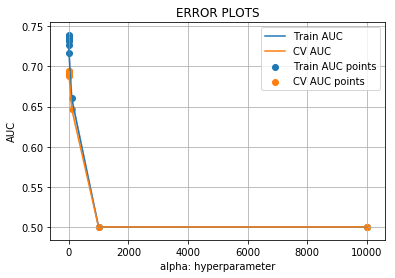

In [45]:
train_auc1= clf1.cv_results_['mean_train_score']
train_auc_std1= clf1.cv_results_['std_train_score']
cv_auc1 = clf1.cv_results_['mean_test_score'] 
cv_auc_std1= clf1.cv_results_['std_test_score']

plt.plot(params['alpha'], train_auc1, label='Train AUC')

# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(params['alpha'],train_auc1 - train_auc_std1,train_auc1 + train_auc_std1,alpha=0.2,color='darkblue')
# create a shaded area between [mean - std, mean + std]

plt.plot(params['alpha'], cv_auc1, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(params['alpha'],cv_auc1 - cv_auc_std1,cv_auc1 + cv_auc_std1,alpha=0.2,color='darkorange')

plt.scatter(params['alpha'], train_auc1, label='Train AUC points')
plt.scatter(params['alpha'], cv_auc1, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h1>Train new model on best params

In [46]:
model_new1 = MultinomialNB(alpha = a,fit_prior = False)
model_new1.fit(X_train_bow,y_train)

MultinomialNB(alpha=1, class_prior=None, fit_prior=False)

# ROC Curve

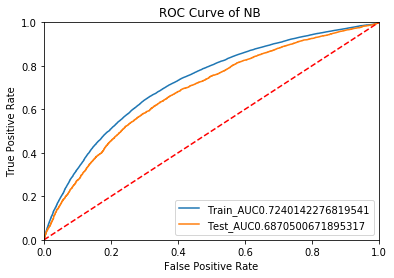

In [47]:
from  sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt


score_roc_train = model_new1.predict_proba(X_train_bow)
fpr_train, tpr_train, threshold_train = roc_curve(y_train, score_roc_train[:,1])
roc_auc_train = auc(fpr_train, tpr_train)

score_roc_test = model_new1.predict_proba(X_test_bow)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, score_roc_test[:,1])
roc_auc_test = auc(fpr_test, tpr_test)


plt.plot(fpr_train, tpr_train, label = "Train_AUC"+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_test, tpr_test, label = "Test_AUC"+str(auc(fpr_test, tpr_test)))
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of NB ')
plt.show()


<h1>Confusion_Matrix

In [48]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

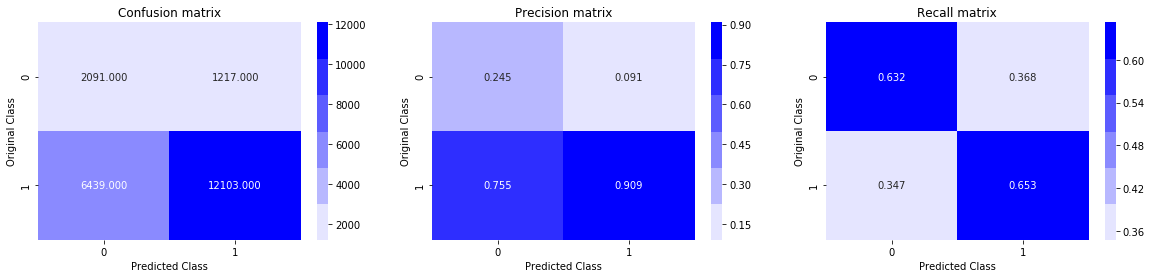

In [49]:
predicted_y = model_new1.predict(X_test_bow)
plot_confusion_matrix(y_test, predicted_y)

<h1>Classification Report

In [50]:
from sklearn.metrics import classification_report
print("_" * 101)
print("Classification Report: \n")
print(classification_report(y_test,predicted_y))
print("_" * 101)


_____________________________________________________________________________________________________
Classification Report: 

              precision    recall  f1-score   support

           0       0.25      0.63      0.35      3308
           1       0.91      0.65      0.76     18542

   micro avg       0.65      0.65      0.65     21850
   macro avg       0.58      0.64      0.56     21850
weighted avg       0.81      0.65      0.70     21850

_____________________________________________________________________________________________________


 # The top 10 features of positive class and top 10 features of negative class 

In [51]:
# for class 0

import operator

y_pedict_log_prob = model_new1.feature_log_prob_[0,:]
feature_name = features_name7+features_name8
name = {}
for i in range(len(feature_name)):
    name[feature_name[i]] = y_pedict_log_prob[i]

name_sorted = sorted(name.items(), key = operator.itemgetter(1), reverse = True)
for i in range(10):
    print(name_sorted[i])
 

('nannan', -5.233167718945333)
('also', -5.841520291691973)
('many students', -6.477896617761845)
('students come', -6.485061156537331)
('used', -6.828861060008838)
('receive', -6.8945442818281455)
('backgrounds', -6.963061274417293)
('students able', -6.981972238702991)
('often', -7.005426981406888)
('allow students', -7.0569897152395535)


In [52]:
# for class 1

# for class 0

import operator

y_pedict_log_prob = model_new1.feature_log_prob_[1,:]
feature_name = features_name7+features_name8
name = {}
for i in range(len(feature_name)):
    name[feature_name[i]] = y_pedict_log_prob[i]

name_sorted = sorted(name.items(), key = operator.itemgetter(1), reverse = True)
for i in range(10):
    print(name_sorted[i])
 

('nannan', -5.282350504240176)
('also', -5.737273441709023)
('many students', -6.452058269222292)
('students come', -6.532430381981868)
('used', -6.61345816583219)
('allow students', -6.842330244202072)
('students able', -6.861779913660969)
('receive', -6.883921550226507)
('backgrounds', -6.940853634533807)
('often', -6.982672892066782)


# SET 2 : TF-IDF

In [53]:
# On Clean Essay

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer8 = TfidfVectorizer(min_df=10,ngram_range = (1,4),max_features = 1000)
preprocessed_essays_xtr_tfidf = vectorizer8.fit_transform(x_train['cleaned_essays'])
print("Shape of matrix after one hot encodig ",preprocessed_essays_xtr_tfidf.shape)

preprocessed_essays_xtest_tfidf = vectorizer8.transform(x_test['cleaned_essays'])
print("Shape of matrix after one hot encodig ",preprocessed_essays_xtest_tfidf.shape)

Shape of matrix after one hot encodig  (87398, 1000)
Shape of matrix after one hot encodig  (21850, 1000)


In [54]:
# On Clean_title 

vectorizer9 = TfidfVectorizer(min_df=10,ngram_range = (1,4),max_features = 1000)
preprocessed_title_xtr_tfidf = vectorizer9.fit_transform(x_train['cleaned_title_text'])
print("Shape of matrix after one hot encodig ",preprocessed_title_xtr_tfidf.shape)

preprocessed_title_xtest_tfidf = vectorizer9.transform(x_test['cleaned_title_text'])
print("Shape of matrix after one hot encodig ",preprocessed_title_xtest_tfidf.shape)

Shape of matrix after one hot encodig  (87398, 1000)
Shape of matrix after one hot encodig  (21850, 1000)


In [55]:
# Concatenate TFIDF
from scipy.sparse import hstack
X_train_tfidf=hstack((preprocessed_essays_xtr_tfidf,preprocessed_title_xtr_tfidf,x_train_clean_cat_ohe,x_train_clean_subcat_ohe,x_train_state_ohe,x_train_teacher_pre,x_train_grade_ohe,x_train_price_std,x_train_teacher_previously_std
                   ,x_train_quantity_std )).tocsr()
#X_cv_tfidf=hstack((preprocessed_essays_xcv_tfidf,preprocessed_title_xcv_tfidf,x_cv_clean_cat_ohe,x_cv_clean_subcat_ohe, x_cv_state_ohe, x_cv_teacher_pre, x_cv_grade_ohe, x_cv_price_std,x_cv_teacher_previously_std))
                 
X_test_tfidf=hstack((preprocessed_essays_xtest_tfidf,preprocessed_title_xtest_tfidf,x_test_clean_cat_ohe,x_test_clean_subcat_ohe, x_test_state_ohe, x_test_teacher_pre, x_test_grade_ohe, x_test_price_std,x_test_teacher_previously_std
                    
                ,x_test_quantity_std   )).tocsr()

In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

params={'alpha' : [10**i for i in range(-6,5)]}

clf_tfidf = MultinomialNB(alpha = 'alpha')

clf2=GridSearchCV(clf_tfidf ,param_grid = params, scoring="roc_auc", cv=10, verbose=12, n_jobs=6)
clf2.fit(X_train_tfidf,y_train)
clf2.best_params_,clf2.best_estimator_,clf2.best_score_

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done   3 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done   5 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done   7 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done  11 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done  15 tasks      | elapsed:    1.7s
[Parallel(

({'alpha': 1},
 MultinomialNB(alpha=1, class_prior=None, fit_prior=True),
 0.6579766748759429)

In [58]:
a2 = clf2.best_params_["alpha"]

print(a2)


1


# Performance Plot

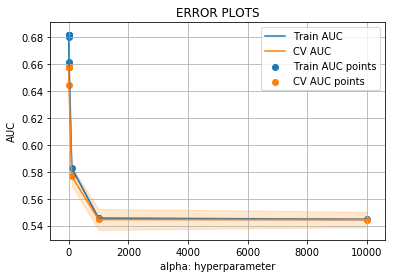

In [59]:
train_auc1= clf2.cv_results_['mean_train_score']
train_auc_std1= clf2.cv_results_['std_train_score']
cv_auc1 = clf2.cv_results_['mean_test_score'] 
cv_auc_std1= clf2.cv_results_['std_test_score']

plt.plot(params['alpha'], train_auc1, label='Train AUC')

# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(params['alpha'],train_auc1 - train_auc_std1,train_auc1 + train_auc_std1,alpha=0.2,color='darkblue')
# create a shaded area between [mean - std, mean + std]

plt.plot(params['alpha'], cv_auc1, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(params['alpha'],cv_auc1 - cv_auc_std1,cv_auc1 + cv_auc_std1,alpha=0.2,color='darkorange')

plt.scatter(params['alpha'], train_auc1, label='Train AUC points')
plt.scatter(params['alpha'], cv_auc1, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h1>Train new model on best params

In [62]:
model_new2 = MultinomialNB(alpha = a2 )
model_new2.fit(X_train_tfidf,y_train)


MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

# ROC Curve

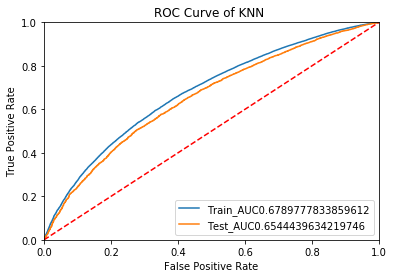

In [63]:
from  sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt


score_roc_train = model_new2.predict_proba(X_train_tfidf)
fpr_train, tpr_train, threshold_train = roc_curve(y_train, score_roc_train[:,1])
roc_auc_train = auc(fpr_train, tpr_train)

score_roc_test = model_new2.predict_proba(X_test_tfidf)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, score_roc_test[:,1])
roc_auc_test = auc(fpr_test, tpr_test)


plt.plot(fpr_train, tpr_train, label = "Train_AUC"+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_test, tpr_test, label = "Test_AUC"+str(auc(fpr_test, tpr_test)))
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN ')
plt.show()


# Confusion Matrix

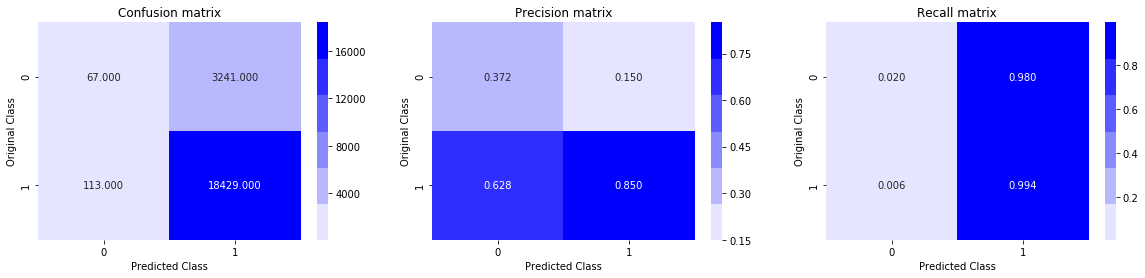

In [64]:
predicted_y2 = model_new2.predict(X_test_tfidf)
plot_confusion_matrix(y_test, predicted_y2)

# Classification Report

In [65]:
from sklearn.metrics import classification_report
print("_" * 101)
print("Classification Report: \n")
print(classification_report(y_test,predicted_y2))
print("_" * 101)


_____________________________________________________________________________________________________
Classification Report: 

              precision    recall  f1-score   support

           0       0.37      0.02      0.04      3308
           1       0.85      0.99      0.92     18542

   micro avg       0.85      0.85      0.85     21850
   macro avg       0.61      0.51      0.48     21850
weighted avg       0.78      0.85      0.78     21850

_____________________________________________________________________________________________________


 # The top 10 features of positive class and top 10 features of negative class 

In [66]:
feature_name_tfidf = vectorizer9.get_feature_names() + vectorizer8.get_feature_names()

In [67]:
# for class 0

import operator

y_pedict_log_prob = model_new2.feature_log_prob_[0,:]

name_tfidf = {}
for i in range(len(feature_name_tfidf)):
    name_tfidf[feature_name_tfidf[i]] = y_pedict_log_prob[i]

name_tfidf_sorted = sorted(name_tfidf.items(), key = operator.itemgetter(1), reverse = True)
for i in range(10):
    print(name_tfidf_sorted[i])
 

('chromebook', -5.913586960232041)
('to read', -6.016957369298539)
('kindles', -6.041128358995049)
('through art', -6.105653117461749)
('wiggles', -6.157351574304518)
('workshop', -6.269589854310943)
('pro', -6.314587696170584)
('let', -6.320687823609011)
('wiggle while', -6.376670540050591)
('you hear', -6.412861703452299)


In [68]:
# for class 0

import operator

y_pedict_log_prob = model_new2.feature_log_prob_[1,:]

name_tfidf = {}
for i in range(len(feature_name_tfidf)):
    name_tfidf[feature_name_tfidf[i]] = y_pedict_log_prob[i]

name_tfidf_sorted = sorted(name_tfidf.items(), key = operator.itemgetter(1), reverse = True)
for i in range(10):
    print(name_tfidf_sorted[i])
 

('chromebook', -5.850299185149732)
('through art', -6.015855988984216)
('to read', -6.016421761708642)
('pro', -6.071199938385796)
('kindles', -6.101798583893006)
('wiggles', -6.149727065314974)
('workshop', -6.244430506611863)
('thinkers', -6.263662060452925)
('lights camera', -6.329844402515219)
('ye', -6.361638715249332)


# Conclusions

In [70]:
from prettytable import PrettyTable

pretty = PrettyTable()

pretty.field_names = ['Vectorizer','Hyperparameter_alpha','AUC_train','AUC_test']

pretty.add_row(['BOW',a,'0.724','0.686'])
pretty.add_row(['TF-IDF',a2,'0.678','0.654'])

print(pretty)

+------------+----------------------+-----------+----------+
| Vectorizer | Hyperparameter_alpha | AUC_train | AUC_test |
+------------+----------------------+-----------+----------+
|    BOW     |          1           |   0.724   |  0.686   |
|   TF-IDF   |          1           |   0.678   |  0.654   |
+------------+----------------------+-----------+----------+
